In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!pip install pandas_profiling
!pip install sweetviz

In [4]:
data= pd.read_csv('E:/data science\Assignments_Data_science/Simple linear regression/delivery_time.csv')

In [5]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


# Renaming the columns

In [43]:
data_new = data.rename({'Delivery Time': 'DT', 'Sorting Time': 'ST'}, axis=1)

In [44]:
data_new

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [16]:
type(data)
data.shape

(21, 2)

In [17]:
data.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

# Outlier detection 

{'whiskers': [<matplotlib.lines.Line2D at 0x1a512cf7a90>,
 'caps': [<matplotlib.lines.Line2D at 0x1a512d10190>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a512cf7730>,
 'medians': [<matplotlib.lines.Line2D at 0x1a512d10850>,
 'fliers': [<matplotlib.lines.Line2D at 0x1a512d10bb0>,
 'means': []}

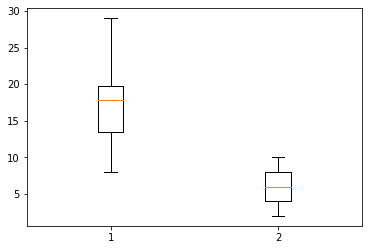

In [20]:
plt.boxplot(data)

# Duplicates 

In [52]:
data_new[data_new.duplicated()]

,DT,ST


#As there is no missing values, invalid values, duplicated values or outliers we can use this dataframe for simple linear regression 

# Correlation

In [21]:
# To find correlation
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


#Above correlation values states that the delivery time has strong positive correlation with Sorting time

C:\Users\Akshay Sonawane\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

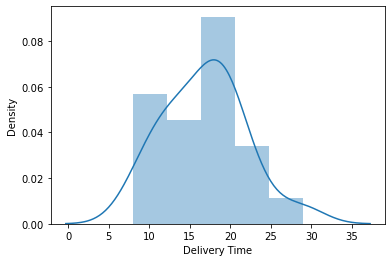

In [24]:
sns.distplot(data['Delivery Time'])

C:\Users\Akshay Sonawane\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

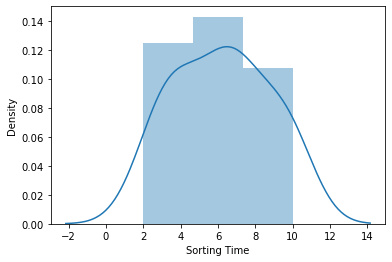

In [27]:
sns.distplot(data['Sorting Time'])

# Model building

In [54]:
#Fitting linear regression model 
import statsmodels.formula.api as smf
model = smf.ols("DT ~ ST", data = data_new).fit()

<AxesSubplot:xlabel='ST', ylabel='DT'>

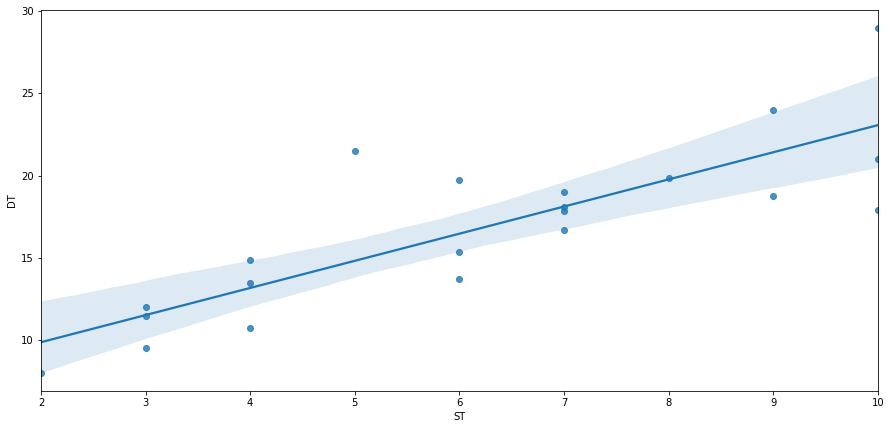

In [73]:
#regression plot 
fig = plt.figure(figsize=(15,7))
sns.regplot(x='ST',y='DT', data= data_new)

# Model Testing

In [67]:
# coefficients
model.params

Intercept    6.582734
ST           1.649020
dtype: float64

In [69]:
#print p / t values
print(model.tvalues,'\n', model.tvalues)

Intercept    3.823349
ST           6.387447
dtype: float64 
 Intercept    3.823349
ST           6.387447
dtype: float64


In [72]:
#R squared values
model.rsquared

0.6822714748417231

# Model prediction


In [98]:
#manual model prediction, Assume sorting time =12 and 15 mins
delivery_time1 =6.582734 + 1.649020*12
print('delivery_time_12 = ' ,delivery_time1 )
delivery_time2 =6.582734 + 1.649020*15
print('delivery_time_15 = ' ,delivery_time )

delivery_time_12 =  26.370973999999997
31.318033999999997


In [86]:
#automatic model predication for sorting time =12 and 15 
data_test =pd.Series([12,15])
data_test

0    12
1    15
dtype: int64

In [92]:
data_pred = pd.DataFrame(data_test, columns=['ST'])
data_pred

,ST
0,12
1,15


In [94]:
model.predict(data_pred)

0    26.370973
1    31.318032
dtype: float64

ERROR! Session/line number was not unique in database. History logging moved to new session 139
